# Digital Humanities Asia Workshop
# Stylometerics and Genre Research in Imperial Chinese Studies
# Coding for Stylometric Analysis
## Paul Vierthaler, Boston College
### @pvierth, vierthal@bc.edu

# Texts encodings
It is important to know the encodings of the files you are working with. This is probably one of the largest difficulties faced by people working with Chinese language texts.

## Common encodings
Chinese language digital texts coming a variety of encodings

### UTF-8
This is the easiest to work with. UTF, which stands for Unicode Transformation Format, is an international character set that encodes texts in all languages. It extends the ASCII character set and is the most common encoding on the internet.

### GB 2312
This was the official character set of the People's Republic of China. It is a simplified character set.

### GBK
GBK extends GB 2312, adding missing characters.

### GB 18030
GB 18030 was designed to replace GB 2312 and GBK in 2005. It is a Unicode format but maintains compatibility with GB 2312. It also allows for traditional characters, as it is a Unicode encoding.

### Big5
Big5 is a traditional Chinese format that is common in Taiwan and Hong Kong.

## GB 2312 is still very common.
Many websites and texts files containing Chinese text still use GB 2312. 

## We will generally try to convert texts to UTF-8 if they are not already UTF-8.

# File Organization
If we want to perform Stylometric analysis and compare a variety of texts, it is easiest to ensure that they are all in the same folder. This will allow us to write code that cleans the text and performs the analysis quickly and easily.

## Make a Folder for your files.
This will need to be in the same folder as this Jupyter notebook. I have provided a collection of files to analyze as part of the workshop. Name the folder something sensible. I have chosen to call the included folder "corpus."

## Decide on a way to store metadata.
If we want to keep track of information about our texts, we need to decide on a way to do this. I prefer to include a metadata file in the same folder as my Python script that describes each text. Each text is given an idea for a file name. We will use that ID to look up information about the text.

#### Setting up plotting for notebook
The following code sets up the plotting used in this notebook. Feel free to ignore this.

In [1]:
%pylab inline
pylab.rcParams['figure.figsize']=(12,8)

Populating the interactive namespace from numpy and matplotlib


# Let's code!
## Opening a file and reading it to string
This is how we will be getting our data into Python.

In [2]:
my_file = open("test.txt", "r")
file_contents = my_file.read()
print(file_contents)

Hi, my name is Paul.


## Opening parameters
open() takes several parameters. First, the file path then the open mode.
"r" means read
"w" means write
"a" means append

## Be careful with "w"!
If you open a file in write mode, if it exists, the program will wipe the files contents without warning you. If it doesn't exist, it will automatically create the file.

## Setting the encoding
By default, strings in Python3 are Unicode. If the file you are opening is not unicode, you have to tell python. If it is unicode, you don't have to tell it anything

In [3]:
my_file = open("test.txt", "r", encoding="utf-8")
file_contents = my_file.read()
print(file_contents)

Hi, my name is Paul.


## Dealing with Errors
When you open many files at once, you will sometimes run in to errors in encoding no matter what you do. You have several options. You can delete the bad character, or replace it with a question mark. The corpus I've provided doesn't have any of these issues, but as you adapt it to run in the wild, you may run in to some issues

In [4]:
my_file = open("test.txt", "r", encoding="utf-8", errors="replace")
file_contents = my_file.read()
print(file_contents)

Hi, my name is Paul.


## Opening multiple files.
You don't want to open each file you are interested in one at a time. Here we will import a library that will help us with this and save the contents.
On Windows machines you will need specify the encoding of a Chinese text file, even when it is UTF-8.

In [5]:
import os

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        # I do not want to open hidden files
        if filename[0] != ".":
            # open the file
            f = open(root + "/" + filename, "r", encoding = "utf8")
            # read the contents to a variable
            c = f.read()
            # make sure to close the file when you are done
            f.close()

            # check to see if your code is working
            # here I am just printing the length of the string
            # printing the string would take up a lot of room.
            print(len(c))

71012
104913
63995
94443
336711
150174
132795
934719
881302
498485
729578
884885
615823
398945


## Save the information to use later.

info_list = []

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r")
            c = f.read()
            f.close()
            info_list.append(c)
            
for c in info_list:
    print(len(c))

## Cleaning the texts
The texts must first be cleaned before they can do anything. The best way to do this is to write a function and will perform the cleaning. We will then call it when we need our texts to be cleaned. We will remove most unwanted characters with regular expressions. As we will have multiple characters not matching the regex, we will use a loop for the rest.

In [6]:
import re

def clean(instring):
    # Remove mid-file markers
    instring = re.sub(r'~~~START\|.+?\|START~~~', "", instring)
    
    # This regex will remove all letters and numbers
    instring = re.sub(r'[a-zA-Z0-9]', "", instring)
    
    # A variety of characters to remove
    unwanted_chars = ['』','。', '！', '，', '：', '、', '（',
                      '）', '；', '？', '〉', '〈', '」', '「',
                      '『', '“', '”', '!', '"', '#', '$', '%',
                      '&', "'", '(', ')', '*', '+', ',', '-',
                      '.', '/', "《", "》", "·", "a", "b"]
    
    for char in unwanted_chars:
        # replace each character with nothing
        instring = instring.replace(char, "")
    
    # return the resulting string.
    return instring

## Clean the text before saving it

In [7]:
info_list = []
# just for demonstration purposes
not_cleaned = []

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r", encoding="utf8")
            c = f.read()
            f.close()
            
            not_cleaned.append(c)
            info_list.append(clean(c))

print("This is before:" + not_cleaned[0][:30])
print("This is after: " + info_list[0][:30])

This is before:
~~~START|0-六十种曲紫钗记-明-汤显祖|STAR
This is after: 


六十种曲 紫钗记 明 汤显祖



紫钗记　　明汤显祖


## Remove Whitespace
As there was no whitespace in the original text, you might want to remove it from your digital copy. We can either do this easily with a regular expression in the file-reading stage. We could also add it to the cleaning function if we like.

In [8]:
info_list = []
# just for demonstration purposes
not_cleaned = []

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r", encoding="utf8")
            c = f.read()
            f.close()
            
            not_cleaned.append(c)
            
            # remove white space
            c = re.sub("\s+", "", c)
            
            info_list.append(clean(c))

print("This is before:" + not_cleaned[0][:30])
print("This is after: " + info_list[0][:30])

This is before:
~~~START|0-六十种曲紫钗记-明-汤显祖|STAR
This is after: 六十种曲紫钗记明汤显祖紫钗记明汤显祖着绣刻演剧十本第二套南西


## Decide how to break apart strings
Now that we have a clean string to analyze, we will want to decide how to analyze it. The first step is to decide if we want to look at the entire text, or break it apart into equal lengths. There are advantages and disadvantages to each. I will show you how to break apart the texts. To not break the text apart, simply change break_apart to False.

In [9]:
# This function does not retain the leftover small section at
# the end of the text
def textBreak(inputstring):
    # Decide how long each section should be
    divlim = 10000
    
    # Calculate how many loops to run
    loops = len(inputstring)//divlim
    
    # Make an empty list to save the results
    save = []
    
    # Save chunks of equal length
    for i in range(0, loops):
        save.append(inputstring[i * divlim: (i + 1) * divlim])
    
    return save

break_apart = True

if break_apart == True:
    broken_chunks = []

    for item in info_list:
        broken_chunks.extend(textBreak(item))
        
# Check to see if it worked.
print(len(broken_chunks[0]))

10000


## Deal with Metadata
If you have structured your data well, you should have a metadata file that keeps track of each document in your corpus. This is not essential, but it is very helpful.

### Read metadata file into a dictionary.
There are a variety of ways of doing this. I am just going to break the text apart and build the dictionary manually.

In [10]:
# Create a dictionary to store the information
metadata = {}

# open and extract the string
metadatafile = open("metadata.txt", "r", encoding="utf8")
metadatastring = metadatafile.read()
metadatafile.close()

# split into by line
lines = metadatastring.split("\n")
for line in lines:
    # split using tabs
    cells = line.split("\t")
    
    # use the first column as the key, which I use store
    # the rest of the columns
    metadata[cells[0]] = cells[1:]
    
print(metadata)
    

{'04': ['儒林外史', '吴敬梓', '清', '小说'], '13': ['警世通言', '冯梦龙', '明', '话本'], '07': ['水浒传', '施耐庵', '明', '小说'], '03': ['牡丹亭', '汤显祖', '明', '传奇'], '05': ['十二楼', '李渔', '清', '小说'], '00': ['紫钗记', '汤显祖', '明', '传奇'], '12': ['三国演义', '罗贯中', '明', '小说'], '01': ['桃花扇', '孔尚任', '清', '传奇'], '09': ['聊斋志异', '蒲松龄', '清', '话本'], '08': ['红楼梦', '曹雪芹', '清', '小说'], '10': ['西游记', '吴承恩', '明', '小说'], '06': ['无声戏', '李渔', '清', '小说'], '02': ['清忠谱', '李玉', '清', '传奇'], '11': ['金瓶梅', '兰陵笑笑生', '明', '小说']}


### Use the Metadata to store information about each file
I usually store the information in parallel lists. This way it is easy for the analysis part of the software to attach different labels.

The following code applies to using whole files (rather than breaking them apart).

In [11]:
# Create empty lists to store the information
info_list = []
title_list = []
author_list = []
era_list = []
genre_list = []

# Create dictionaries store unique info:
title_author = {}
title_era = {}
title_genre = {}

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r", encoding="utf8")
            c = f.read()
            f.close()
            c = re.sub("\s+", "", c)
            c = clean(c)
            # Get metadata. the [:-4] removes the .txt from filename
            metainfo = metadata[filename[:-4]]
            
            info_list.append(c)
            title_list.append(metainfo[0])
            author_list.append(metainfo[1])
            era_list.append(metainfo[2])
            genre_list.append(metainfo[3])
            
            title_author[metainfo[0]] = metainfo[1]
            title_era[metainfo[0]] = metainfo[2]
            title_genre[metainfo[0]] = metainfo[3]
            
print(title_list)

['紫钗记', '桃花扇', '清忠谱', '牡丹亭', '儒林外史', '十二楼', '无声戏', '水浒传', '红楼梦', '聊斋志异', '西游记', '金瓶梅', '三国演义', '警世通言']


### It is a bit more complicated if you break texts apart

In [12]:
# Create empty lists/dictionaries to store the information
info_list = []
title_list = []
author_list = []
era_list = []
genre_list = []
title_author = {}
title_era = {}
title_genre = {}

# We should also track which section number
section_number = []

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r", encoding="utf8")
            c = f.read()
            f.close()
            c = re.sub("\s+", "", c)
            c = clean(c)
            
            # Get metadata. the [:-4] removes the .txt from filename
            metainfo = metadata[filename[:-4]]
            
            # The dictionary formation stays the same
            title_author[metainfo[0]] = metainfo[1]
            title_era[metainfo[0]] = metainfo[2]
            title_genre[metainfo[0]] = metainfo[3]
        
            # Break the Text apart
            broken_sections = textBreak(c)
            
            # We will need to extend, rather than append
            info_list.extend(broken_sections)
            
            title_list.extend([metainfo[0] for i in 
                               range(0,len(broken_sections))])
            author_list.extend([metainfo[1] for i in 
                                range(0,len(broken_sections))])
            era_list.extend([metainfo[2] for i in 
                             range(0,len(broken_sections))])
            genre_list.extend([metainfo[3] for i in 
                               range(0,len(broken_sections))])
            section_number.extend([i for i in range(0, len(broken_sections))])
            
print(author_list[:20])

['汤显祖', '汤显祖', '汤显祖', '汤显祖', '汤显祖', '孔尚任', '孔尚任', '孔尚任', '孔尚任', '孔尚任', '孔尚任', '孔尚任', '孔尚任', '李玉', '李玉', '李玉', '李玉', '李玉', '汤显祖', '汤显祖']


## Let's put these two together
Let's add some logic so we can easily switch between the two.

In [13]:
# Create empty lists/dictionaries to store the information
info_list = []
title_list = []
author_list = []
era_list = []
genre_list = []
section_number = []
title_author = {}
title_era = {}
title_genre = {}

break_apart = False

for root, dirs, files in os.walk("corpus"):
    for filename in files:
        if filename[0] != ".":
            f = open(root + "/" + filename, "r", encoding="utf8")
            c = f.read()
            f.close()
            c = re.sub("\s+", "", c)
            c = clean(c)
            
            # Get metadata. the [:-4] removes the .txt from filename
            metainfo = metadata[filename[:-4]]
            
            title_author[metainfo[0]] = metainfo[1]
            title_era[metainfo[0]] = metainfo[2]
            title_genre[metainfo[0]] = metainfo[3]
            
            if not break_apart:
                info_list.append(c)
                title_list.append(metainfo[0])
                author_list.append(metainfo[1])
                era_list.append(metainfo[2])
                genre_list.append(metainfo[3])
                

            else:
                broken_sections = textBreak(c)
                
                info_list.extend(broken_sections)

                title_list.extend([metainfo[0] for i in 
                                   range(0,len(broken_sections))])
                author_list.extend([metainfo[1] for i in 
                                    range(0,len(broken_sections))])
                era_list.extend([metainfo[2] for i in 
                                 range(0,len(broken_sections))])
                genre_list.extend([metainfo[3] for i in 
                                   range(0,len(broken_sections))])
                section_number.extend([i for i in range(0, len(broken_sections))])


## Now we can start calculating common characters
There are a variety of ways to do this. Here I will just use code packaged in the Sci-kit learn module.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Tokenizing the text with sci-kit learn vectorizer
When you use sci-kit learn, you can give it a lot of options. 

## If you have a file with whitespace between items:
You can use whitespace to tokenize your documents. For example, if you have used the Stanford Word Parser, then you can use a vectorizer set up like this to take advantage of this:

In [15]:
vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,1),
                            token_pattern="\S+", max_features = 100)

## If you do not have a file with whitespace between items:
Here we will just use characters to tokenize. This works well with Imperial Chinese. Particularly with wenyan texts. Here we are telling it to look at characters, rathern than words, 1-grams, and the 100 most common characters.

In [16]:
vectorizer = CountVectorizer(analyzer="char",ngram_range=(1,1),
                             max_features = 100)

## Apply the vectorizer to the texts

In [17]:
word_count_matrix = vectorizer.fit_transform(info_list)
# This will tell you the features found by the vectorizer.
vocab = vectorizer.get_feature_names()
print(vocab)

['一', '三', '上', '下', '不', '与', '两', '个', '中', '为', '么', '之', '也', '了', '事', '二', '人', '今', '他', '以', '们', '何', '你', '便', '儿', '先', '公', '军', '出', '到', '前', '十', '去', '又', '只', '叫', '可', '后', '听', '回', '在', '大', '天', '太', '头', '好', '如', '娘', '子', '家', '将', '小', '就', '山', '得', '心', '我', '打', '把', '无', '日', '时', '是', '曰', '有', '来', '正', '此', '玉', '王', '生', '的', '相', '看', '着', '知', '笑', '等', '老', '者', '而', '自', '行', '西', '要', '见', '说', '起', '身', '过', '还', '这', '道', '那', '都', '里', '门', '问', '面', '马']


## This are not in order of the most common character. We can use a library called pandas to asscertain this easily.

In [18]:
import pandas as pd
from pandas import Series

fullcorpus = ""
for text in info_list:
    fullcorpus += text
    
tokens = list(fullcorpus)

corpus_series = Series(tokens)

values = corpus_series.value_counts()

print(values[:10])

不    76780
了    74800
一    65474
来    55932
道    55370
人    54672
的    47706
是    43752
我    37794
他    34373
dtype: int64


## Term Frequency and Term Frequency - Inverse Document Frequency
sci-kit learn also has a term frequency and tfidf vectorizer that you can use, depending on how you want to think about your texts.

In [19]:
# Just use this instead when creating your vectorizer.
# To get TF, tell it to not use idf. otherwise, set to true
vectorizer = TfidfVectorizer(use_idf=False, analyzer="char",
                            ngram_range=(1,1), max_features=10)

## A bit more on normalization
If you are using texts of different length, you will need to be sure that you use some sort of normalization if you are hoping to use euclidean distance as a similarity measure. One of the easier ways to normalize is to adjust the raw character count to occurrences per thousand characters. The code below does this using pandas.

In [20]:
from pandas import DataFrame
# Recreate a CountVectorizer object
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1,1),
                             max_features=100)
word_count_matrix=vectorizer.fit_transform(info_list)
vocab = vectorizer.get_feature_names()

# We will need a dense matrix, not a sparse matrix
dense_words = word_count_matrix.toarray()

corpus_dataframe = DataFrame(dense_words, columns=vocab)

# Calculate how long each document is
doclengths = corpus_dataframe.sum(axis=1)

# Make a series that is the same length as the document length series
# but populated with 1000.
thousand = Series([1000 for i in range(0,len(doclengths))])

# Divide this by the length of each document
adjusteddoclengths = thousand.divide(doclengths)

# Multiply the corpus DataFrame by this adjusting factor
per_thousand = corpus_dataframe.multiply(adjusteddoclengths, axis = 0)

print(per_thousand)

# Convert back to word_count_matrix
word_count_matrix = per_thousand.as_matrix()

            一          三          上          下          不          与  \
0   27.877143   6.845936  26.273591  11.841618  34.353028   4.687307   
1   27.817947  10.084481  20.016744  18.190121  43.001751   3.957683   
2   33.331367   6.725267  25.721196  14.453425  39.407705   5.781370   
3   29.895996   8.547728  20.337698  13.979536  36.885764   2.863278   
4   38.371217   7.975542  15.722156  12.288242  29.767971   4.083773   
5   42.140946   4.799286  10.776093   6.458519  63.157895   8.474576   
6   41.840849   4.217528  11.221968   6.539955  55.385244   8.546532   
7   33.805693   9.313420  19.724803  16.507965  28.553450   7.159230   
8   32.400955   3.266042  10.132487   7.366650  39.909375   2.819335   
9   32.770973   8.023090   9.766867   8.821963  60.276255  11.699624   
10  31.887596  13.490596  14.924652  12.000145  35.605667   8.982989   
11  30.403190   6.492741  15.408553  12.897865  34.868650  10.731604   
12  25.658167   9.200013  13.090122  17.731512  42.880336  11.94

## Using Vocabulary
If you want to, you can give the vectorizer a set vocabulary to pay attention to, rather than just using the most common characters. This comes in handy when you have an idea which characters distinguish the texts most efficiently.

In [21]:
my_vocab = ["的", "之", "曰", "说"]

vectorizer = CountVectorizer(analyzer="char",ngram_range=(1,1),
                             vocabulary = my_vocab)

## Hierarchical Cluster Analysis: Making a Dendrogram
Now we can start calculating the relationships among these works. We will have to decide if we want to use euclidean distance or cosine similarity. We will import several tools to help us do this

### Euclidean Distance
Each vector is understood as a point in space. You will need to calculate the distance between each point. We will use these to judge similarity.

### Cosine similarity
Here we are interested in the direction that each vector points. You will calculate the angle between each point.

In [22]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

euc_or_cosine = "euc"
if euc_or_cosine == "euc":
    similarity = euclidean_distances(word_count_matrix)
elif euc_or_cosine == "cos":
    similarity = cosine_similarity(word_count_matrix)

### You now have a similarity matrix
The similarity variable now contains the similarity measure between each document in the corpus. You can use this to create a linkage matrix which will allow you to visualize the relationships among these texts as a dendrogram.
Here we will use the "Ward" algorithm to cluster the texts together.

In [23]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(similarity)

## Now it is time to visualize the relationships
When run normally, this will open a new window (and it will be higher quality than the image here). You will have to close it for later parts of the script to continue to run.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


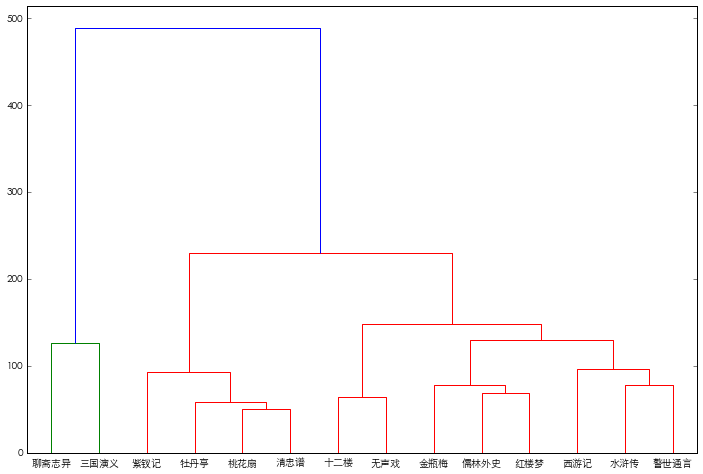

In [24]:
# import the plotting library.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Set the font to a Chinese Font Family
# STHeiti works for Macs, SimHei should work on Windows
# Linux does not come with a compatible Chinese font.
# Here I have defaulted to a Japanese font.
# I've added logic that checks what system you are using.
from sys import platform
if platform == "linux" or platform == "linux2":
    print("Sorry, I can't see the appropriate fonts, defaulting to Japanese")
    matplotlib.rc('font', family="TakaoPGothic")
elif platform == "win32" or platform == "win64":
    matplotlib.rc('font', family="SimHei")
elif platform == "darwin":
    matplotlib.rc('font', family='STHeiti')
    
# Make the Dendrogram
dendrogram(linkage_matrix, labels=title_list)
plt.show()

## This can be made a bit more attractive

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


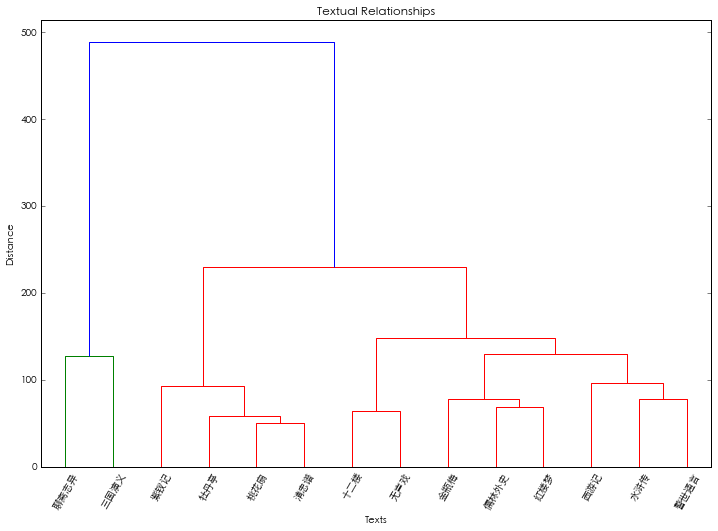

In [25]:
dendrogram(linkage_matrix, labels=title_list)

# Add a Title
plt.title("Textual Relationships")

# Add x and y axis labels
plt.xlabel("Texts")
plt.ylabel("Distance")

# Set the angle of the labels so they are easier to read
plt.xticks(rotation=60)

# Show the plot
plt.show()

## Saving the Figure
To actually use the results, you will need to save the figure. You can save it as a variety of formats. I advise saving it as a pdf, which you can then edit further in Adobe Illustrator or some other vector-editing program.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


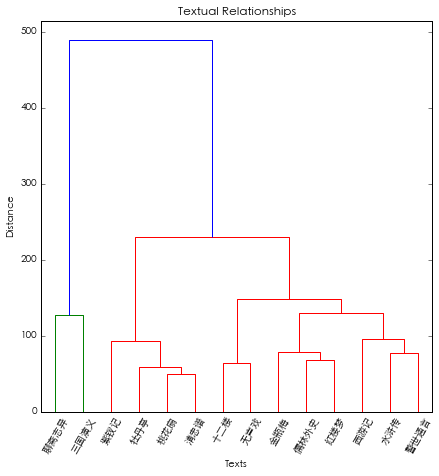

In [26]:
# Set the size of the Figure
# This will make a Seven inch by Seven inch figure
plt.figure(figsize=(7,7))

dendrogram(linkage_matrix, labels=title_list)

# Add a Title
plt.title("Textual Relationships")

# Add x and y axis labels
plt.xlabel("Texts")
plt.ylabel("Distance")

# Set the angle of the labels so they are easier to read
plt.xticks(rotation=60)

plt.savefig("results.pdf")

## Adding some color
Sometimes it helps to add a bit of color to the figure so you can easily interpret it.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


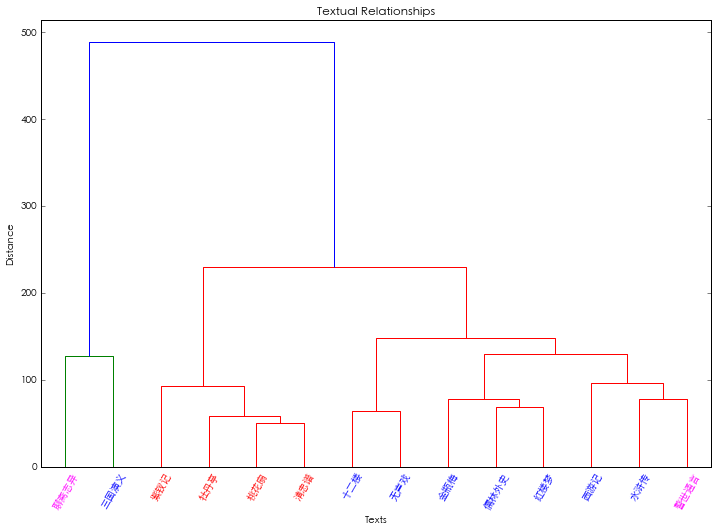

In [27]:
dendrogram(linkage_matrix, labels=title_list)
plt.title("Textual Relationships")
plt.xlabel("Texts")
plt.ylabel("Distance")
plt.xticks(rotation=60)

# Create a dictionary for color selection
# Here we are using genre as the basis for color
# You would need to change this if you wanted to color based on authorship.
color_dict = {"传奇":"red", "小说":"blue", "话本":"magenta"}

# Return information about the tick labels
plt_info = plt.gca()
tick_labels = plt_info.get_xmajorticklabels()

# Iterate through each tick label and assign a new color
for tick_label in tick_labels:
    # Get the genre from the title to genre dictionary
    genre = title_genre[tick_label.get_text()]
    
    # Get the color from the dictionary
    color = color_dict[genre]
    
    # Set the color
    tick_label.set_color(color)
    
# Show the plot
plt.show()

# Principal Component Analysis
There are other ways to visualize the relationships among these texts. Principal component analysis is a way to explore the variance within the dataset. We can use much of the same data that we used for hierarchical cluster analysis.

## Sci-kit learn also has the components necessary
You will need to import a few new modules

In [28]:
from sklearn.decomposition import PCA

## Principal Components
PCA decomposes the dataset into abstracted components that describe the variance. These can be used as axes on which to replot the data. This will often allow you to get the best view of the data (or at least the most comprehensive).

### How many components
Generally you will only need the first two principal components (which will describe the most variance within the dataset. Sometimes you will be interested in the third and fourth components. For now, just the first two will be fine.

In [29]:
# Create the PCA object
pca = PCA(n_components = 2)

# PCA requires a dense matrix. word_count_matrix is sparse
# unless you ran the normalization to per 1000 code above!
# Convert it to dense matrix
#dense_words = word_count_matrix.toarray()
dense_words = word_count_matrix
# Analyze the dataset
my_pca = pca.fit(dense_words).transform(dense_words)

## Plotting the results
Ploting the actual PCA is the first task. In a moment we will look at how to plot the loadings.

### Setting up to Plot
You will need to decide how to visualize the results. Do you want to visualize by author, title, or genre?
We will write a function to take care of this.

In [30]:
import numpy as np

# The input here will be the information you want to use to color
# the graph.
def info_for_graph(input_list):
    # This will return the unique values.
    # [a, a, a, b, b] would become
    # {a, b}
    unique_values = set(input_list)
    
    # create a list of numerical label and a dictionary to
    # populate a list
    unique_labels = [i for i in range(0, len(unique_values))]
    unique_dictionary = dict(zip(unique_values, unique_labels))
    
    # make class list
    class_list = []
    for item in input_list:
        class_list.append(unique_dictionary[item])
    
    return unique_labels, np.array(class_list), unique_values

### Using this information
This function returns everything we will need to properly visualize our Principal component analysis.
Call the function and use the results.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


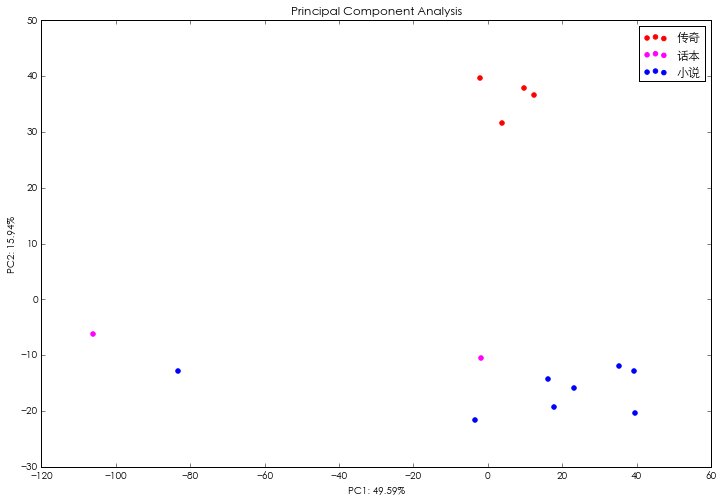

In [31]:
unique_labels, info_labels, unique_genres = info_for_graph(genre_list)

# Make a color list, the same length as unique labels
colors = ["red", "magenta", "blue"]

# Make the figure
plt.figure()

# Plot the points using color information.
# This code is partially adapted from brandonrose.org/clustering
for color, each_class, label in zip(colors, unique_labels, unique_genres):
    plt.scatter(my_pca[info_labels == each_class, 0],
               my_pca[info_labels == each_class, 1],
               label = label, color = color)
    
# You should title the plot label your axes
plt.title("Principal Component Analysis")
plt.xlabel("PC1: " + "{0:.2f}".format(pca.explained_variance_ratio_[0] * 100)+"%")
plt.ylabel("PC2: " + "{0:.2f}".format(pca.explained_variance_ratio_[1] * 100)+"%")
    
# Give it a legend
plt.legend()

plt.show()

## Adding labels
It is fairly simple to add a line of code that adds labels to the figure. This is useful when you want to know where individual texts fall. It is less useful when you want to plot many texts at once.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


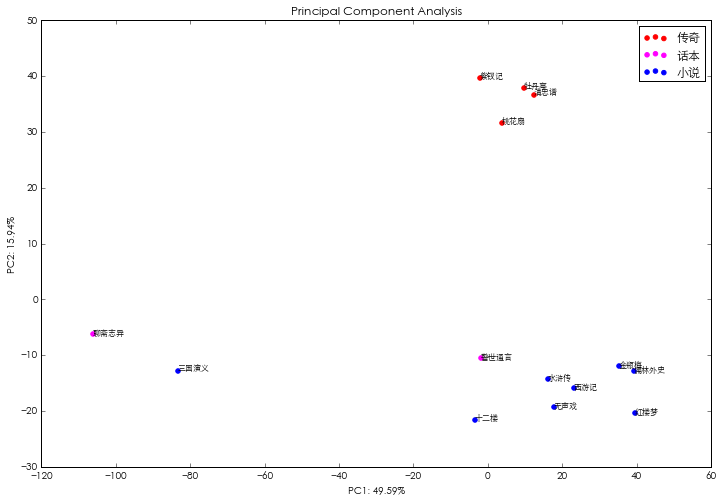

In [32]:
unique_labels, info_labels, unique_genres = info_for_graph(genre_list)
colors = ["red", "magenta", "blue"]
plt.figure()

for color, each_class, label in zip(colors, unique_labels, unique_genres):
    plt.scatter(my_pca[info_labels == each_class, 0],
               my_pca[info_labels == each_class, 1],
               label = label, color = color)
    
for i, text_label in enumerate(title_list):
    plt.annotate(text_label,  xy = (my_pca[i, 0], my_pca[i, 1]),
                 xytext=(my_pca[i, 0], my_pca[i, 1]), 
                 size=8)
plt.title("Principal Component Analysis")
plt.xlabel("PC1: " + "{0:.2f}".format(pca.explained_variance_ratio_[0] * 100)+"%")
plt.ylabel("PC2: " + "{0:.2f}".format(pca.explained_variance_ratio_[1] * 100)+"%")
plt.legend()

plt.show()

## Loadings Plot
You will often want to know how the individual variables have influenced where each text falls. The following code will create a loadings plot using the same data.

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


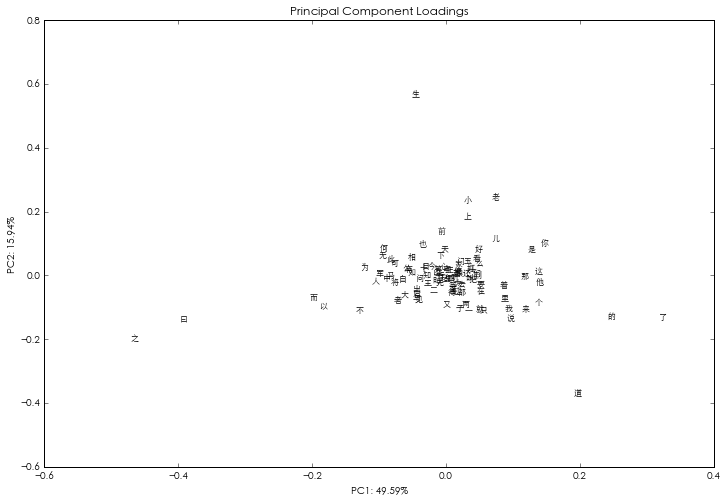

In [33]:
loadings = pca.components_

# This will plot the locations of the loadings, but make the 
# points completely transparent.
plt.scatter(loadings[0], loadings[1], alpha=0)

# Label and Title
plt.title("Principal Component Loadings")
plt.xlabel("PC1: " + "{0:.2f}".format(pca.explained_variance_ratio_[0] * 100)+"%")
plt.ylabel("PC2: " + "{0:.2f}".format(pca.explained_variance_ratio_[1] * 100)+"%")

# Iterate through the vocab and plot where it falls on loadings graph
# numpy array the loadings info is held in is in the opposite format of the
# pca information
for i, txt in enumerate(vocab):
    plt.annotate(txt, (loadings[0, i], loadings[1, i]), horizontalalignment='center',
                 verticalalignment='center', size=8)
    
plt.show()